# Redback: an open source bayesian inference package for fitting electromagnetic transients. 

## How redback can be useful to you.
- Download data for supernovae, tidal disruption events, gamma-ray burst afterglows, kilonovae, prompt emission from different catalogs/telescopes; Swift, BATSE, Open access catalogs. Users can also provide their own data or use simulated data

- Redback processes the data into a homogeneous transient object, plotting lightcurves and doing other processing.

- The user can then fit one of the models implemented in redback. Or fit their own model. Models for several different types of electromagnetic transients are implemented and range from simple analytical models to numerical surrogates.

- All models are implemented as functions and can be used to simulate populations, without needing to provide data. This way redback can be used simply as a tool to simulate realistic populations, no need to actually fit anything.

- [Bilby](https://lscsoft.docs.ligo.org/bilby/index.html) under the hood. Can easily switch samplers/likelihoods etc. Over 15 samplers are implemented and the list continues to grow. 

- Fitting returns a homogenous result object, with functionality to plot lightcurves/walkers/corner and the posterior/evidence/credible interval etc. This way redback results can feed into hierarchical analysis of populations of transients or be used in reweighting.

### Online documentation

- #### [Installation](https://redback.readthedocs.io/en/latest/)
- #### [Examples](https://github.com/nikhil-sarin/redback/tree/master/examples)
- #### [Documentation](https://redback.readthedocs.io/en/latest/)

### Contributing 
- Redback is currently at version 1.0, the version that accompanied the first paper. If you are interested in contributing please join the redback [slack](https://join.slack.com/t/redback-group/shared_invite/zt-21rsoa26s-kibI8MiA1JiIKM0wCMp5rQ) and get in touch with [me](mailto:nikhil.sarin@su.se?subject=Contributing%20to%20redback).
- All contributors at the alpha stage will be invited to be co-authors of the first paper.

<!-- ![](notebook_images/RedbackLogo.png) -->
<img src="notebook_images/RedbackLogo.png" alt="drawing" width="500"/>

In [10]:
import redback 
import pandas as pd
from bilby.core.prior import PriorDict
import bilby
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import numpy as np

## Downloading data from different catalogs e.g., the open access catalogs

In [11]:
kne = 'at2017gfo'

data = redback.get_data.get_kilonova_data_from_open_transient_catalog_data(transient=kne)
data

16:05 redback WARNING : The raw data file already exists.
16:05 redback WARNING : The processed data file already exists. Returning.


,event,time,magnitude,e_magnitude,band,system,flux_density(mjy),flux_density_error,flux(erg/cm2/s),flux_error,time (days)
0,at2017gfo,57982.981400,17.48,0.02,i,AB,0.369828,0.006813,2.193027e-13,4.039705e-15,0.481400
1,at2017gfo,57982.990200,18.26,0.15,H,AB,0.180302,0.024911,4.942583e-14,6.828431e-15,0.490200
2,at2017gfo,57982.993000,17.46,0.03,r,AB,0.376704,0.010409,3.150974e-13,8.706462e-15,0.493000
3,at2017gfo,57982.999000,18.62,0.05,Ks,AB,0.129420,0.005960,2.189679e-14,1.008385e-15,0.499000
4,at2017gfo,57983.000000,17.83,0.15,J,AB,0.267917,0.037016,8.596584e-14,1.187662e-14,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
615,at2017gfo,58001.988519,20.85,0.13,Ks,AB,0.016596,0.001987,2.807893e-15,3.362014e-16,19.488519
616,at2017gfo,58001.989000,21.23,0.37,Ks,AB,0.011695,0.003986,1.978703e-15,6.743074e-16,19.489000
617,at2017gfo,58001.992000,23.37,0.48,z,AB,0.001629,0.000720,7.139539e-16,3.156364e-16,19.492000
618,at2017gfo,58003.969000,21.46,0.08,Ks,AB,0.009462,0.000697,1.600960e-15,1.179631e-16,21.469000


The user is returned the data in a pandas dataframe. The data is also saved in a sensible way. There are two files; the raw data file and the processed data file where we do some basic processing and make it homogenous. Note that the data returned here is a simple pandas dataframe and can be manipulated in arbitrary ways.

For example, let's say I just want to see the i band data

In [12]:
data[data['band']=='i']

,event,time,magnitude,e_magnitude,band,system,flux_density(mjy),flux_density_error,flux(erg/cm2/s),flux_error,time (days)
0,at2017gfo,57982.981400,17.480000,0.020000,i,AB,0.369828,0.006813,2.193027e-13,4.039705e-15,0.481400
7,at2017gfo,57983.003060,17.480131,0.025298,i,AB,0.369784,0.008617,2.192763e-13,5.109308e-15,0.503060
14,at2017gfo,57983.018251,17.470000,0.020000,i,AB,0.373250,0.006876,2.213319e-13,4.077084e-15,0.518251
21,at2017gfo,57983.050000,16.984000,0.050000,i,AB,0.583983,0.026895,3.462933e-13,1.594739e-14,0.550000
25,at2017gfo,57983.059977,17.510000,0.020000,i,AB,0.359749,0.006627,2.133261e-13,3.929612e-15,0.559977
...,...,...,...,...,...,...,...,...,...,...,...
468,at2017gfo,57989.989700,21.420000,0.180000,i,AB,0.009817,0.001628,5.821622e-15,9.651442e-16,7.489700
473,at2017gfo,57990.038519,20.910000,0.030000,i,AB,0.015704,0.000434,9.312023e-15,2.573007e-16,7.538519
490,at2017gfo,57990.987655,20.723858,0.057474,i,AB,0.018640,0.000987,1.105353e-14,5.851279e-16,8.487655
523,at2017gfo,57991.999670,21.369510,0.056551,i,AB,0.010285,0.000536,6.098740e-15,3.176573e-16,9.499670


### Can similarly download data from LASAIR (ZTF/Vera Rubin broker), Afterglows from Swift, Prompt grb from Swift and BATSE.  

In [13]:
GRB = '070809'
# Flux density, flux data
data = redback.get_data.get_bat_xrt_afterglow_data_from_swift(grb=GRB, data_mode="flux")
data

16:05 redback WARNING : You are downloading BAT and XRT data, you will need to truncate the data for some models.
16:05 redback WARNING : The raw data file already exists. Returning.
16:05 redback WARNING : The processed data file already exists. Returning.


,Time [s],Pos. time err [s],Neg. time err [s],Flux [erg cm^{-2} s^{-1}],Pos. flux err [erg cm^{-2} s^{-1}],Neg. flux err [erg cm^{-2} s^{-1}],Instrument
0,0.261,0.020,-0.020,8.611267e-08,1.558190e-08,-1.558190e-08,xrtpcflux_nosys_incbad
1,0.321,0.040,-0.040,7.380720e-08,1.642034e-08,-1.642034e-08,xrtpcflux_nosys_incbad
2,0.381,0.020,-0.020,1.870014e-07,3.719962e-08,-3.719962e-08,xrtpcflux_nosys_incbad
3,0.441,0.040,-0.040,1.006884e-07,2.659470e-08,-2.659470e-08,xrtpcflux_nosys_incbad
4,0.521,0.040,-0.040,7.196865e-08,1.679300e-08,-1.679300e-08,xrtpcflux_nosys_incbad
5,0.601,0.040,-0.040,5.673616e-08,1.384672e-08,-1.384672e-08,xrtpcflux_nosys_incbad
6,0.681,0.040,-0.040,1.054567e-07,2.272572e-08,-2.272572e-08,xrtpcflux_nosys_incbad
7,0.761,0.040,-0.040,1.720020e-07,3.675426e-08,-3.675426e-08,xrtpcflux_nosys_incbad
8,126.691,99.170,-46.253,1.581725e-11,3.569984e-12,-3.569984e-12,xrtpcflux_nosys_incbad
9,300.860,108.035,-74.998,6.084130e-12,1.371615e-12,-1.371615e-12,xrtpcflux_nosys_incbad


In [14]:
sne = "SN2011kl"
data = redback.get_data.get_supernova_data_from_open_transient_catalog_data(sne)
data

16:05 redback WARNING : The raw data file already exists.
16:05 redback WARNING : The processed data file already exists. Returning.


,event,time,magnitude,e_magnitude,band,system,flux_density(mjy),flux_density_error,flux(erg/cm2/s),flux_error,time (days)
0,SN2011kl,54357.753356,18.31,0.12,H,AB,0.172187,0.019032,4.720130e-14,5.216881e-15,0.100000
1,SN2011kl,54357.753356,18.72,0.12,J,AB,0.118032,0.013046,3.787267e-14,4.185842e-15,0.100000
2,SN2011kl,54357.753356,17.84,0.15,Ks,AB,0.265461,0.036677,4.491387e-14,6.205081e-15,0.100000
3,SN2011kl,54357.753356,20.05,0.05,g,AB,0.034674,0.001597,5.073876e-14,2.336606e-15,0.100000
4,SN2011kl,54357.753356,19.36,0.03,i,AB,0.065464,0.001809,3.881897e-14,1.072608e-15,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
118,SN2011kl,54428.243981,23.47,0.44,z,AB,0.001486,0.000602,6.511337e-16,2.638752e-16,70.590625
119,SN2011kl,54636.989120,25.66,0.31,g,AB,0.000198,0.000056,2.892943e-16,8.259946e-17,279.335764
120,SN2011kl,54636.989120,24.36,0.22,i,AB,0.000655,0.000133,3.881897e-16,7.865791e-17,279.335764
121,SN2011kl,54636.989120,25.04,0.18,r,AB,0.000350,0.000058,2.927149e-16,4.852807e-17,279.335764


In [15]:
data = redback.get_data.get_lasair_data(transient="ZTF19aagqkrq", transient_type="afterglow")
data

16:05 redback WARNING : The raw data file already exists.
16:05 redback WARNING : The processed data file already exists. Returning.


,time,magnitude,e_magnitude,system,band,flux_density(mjy),flux_density_error,flux(erg/cm2/s),flux_error,time (days)
0,58511.379282,20.674,0.391,AB,ztfr,0.019516,0.007029,2.040451e-14,7.348161e-15,0.100000
1,58513.429884,18.205,0.151,AB,ztfr,0.189671,0.026380,1.983016e-13,2.757902e-14,2.150602
2,58514.403623,18.116,0.257,AB,ztfr,0.205873,0.048734,2.152416e-13,5.094892e-14,3.124341
3,58514.458171,17.959,0.167,AB,ztfg,0.237903,0.036595,3.790560e-13,5.830362e-14,3.178889
4,58523.421493,17.839,0.269,AB,ztfg,0.265705,0.065835,4.233537e-13,1.048893e-13,12.142211
5,58526.420324,18.143,0.094,AB,ztfg,0.200817,0.017387,3.199657e-13,2.770173e-14,15.141042
6,58538.247049,17.677,0.122,AB,ztfr,0.308461,0.034663,3.224974e-13,3.623779e-14,26.967767
7,58538.294815,18.275,0.164,AB,ztfg,0.177828,0.026862,2.833370e-13,4.279794e-14,27.015533
8,58543.264074,17.643,0.089,AB,ztfr,0.318273,0.026091,3.327562e-13,2.727670e-14,31.984792
9,58543.278565,18.151,0.181,AB,ztfg,0.199343,0.033234,3.176167e-13,5.294898e-14,31.999283


## Transient objects

Since this data is just a simple dataframe, you could play around with it yourself to create plots etc. However, we provide functionality to load this data into a 'transient' object. Providing methods for plotting and other functionality. 

There are 7 different types of transient objects implemented in redback, which all have unique functionality for the specific type of transient. 

#### There are two parent classes

- Transient: For any type of generic transient
- OpticalTransient: For any type of generic optical transient

#### Five more targeted transient classes

- SGRB
- LGRB
- Supernova 
- Kilonova
- Tidal disruption event
- Prompt 

These classes come with lots of functionality and lookup tables which provide metadata useful for further analysis, such as redshift, T90, start time, etc. They also allow other processing such as converting flux to luminosity. 

For each of the transients we have different data_modes which determines what data to fit, plot labels, type of likelihood to use etc. We note that the latter two can be changed by users if desired. The data modes are luminosity, flux, flux_density, magnitude, counts, time tagged events

### Creating a kilonova object for at2017gfo

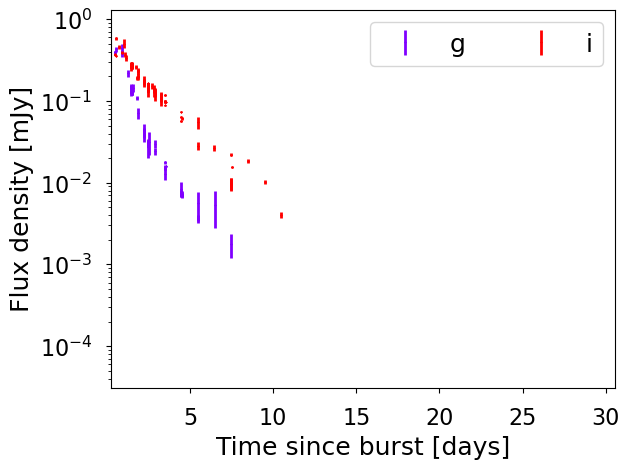

<Axes: xlabel='Time since burst [days]', ylabel='Flux density [mJy]'>

In [17]:
kne = 'at2017gfo'
kilonova = redback.kilonova.Kilonova.from_open_access_catalogue(
    name=kne, data_mode="flux_density", active_bands=np.array(["g", "i"]))
kilonova.plot_data(save=False, plot_others=False)

Here we created the kilonova transient object using the open access catalogue data, with the `data mode == 'flux_density'`. 

Here we have also specified `active_bands=np.array(['g', 'i')`, which sets the rest of the data to be inactive, i.e., not used in the fitting. All bands/frequencies are active by default.

**The function returns the axes so user can change the ylim etc from the default themselves as they would for any other matplotlib plot. Or pass it into the function as a keyword argument**

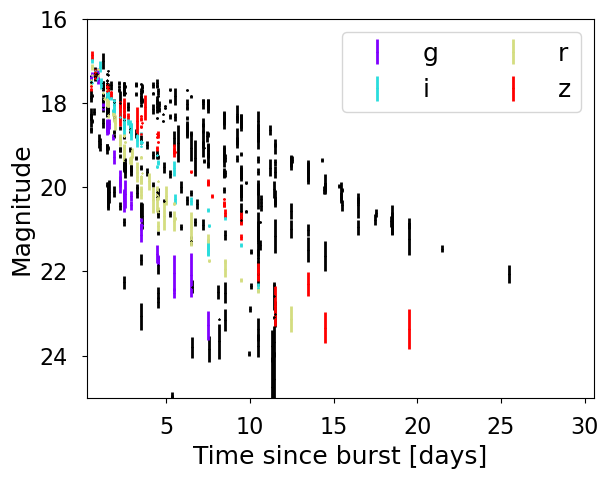

In [18]:
kilonova = redback.kilonova.Kilonova.from_open_access_catalogue(
    name=kne, data_mode="magnitude", active_bands=np.array(["g", "i", "r", "z"]))
ax = kilonova.plot_data(save=False, show=False, plot_others=True)
ax.set_ylim(25,16)
plt.show()

In [19]:
kilonova = redback.kilonova.Kilonova.from_open_access_catalogue(
    name=kne, data_mode="magnitude", active_bands=np.array(["g", "i", "r", "z"]))
ax = kilonova.plot_data(save=False, show=False, plot_others=False, xlim_high=10)

#### Many other plotting aesthetic things can just be passed into the function. 

#### We also provide a simple plot_multiband method. Which will plot one band per panel.

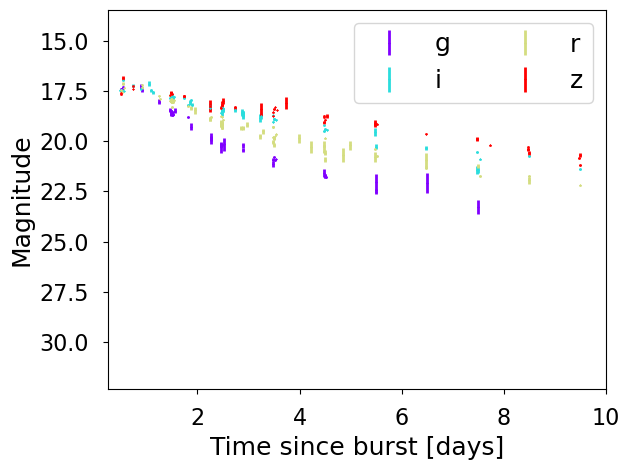

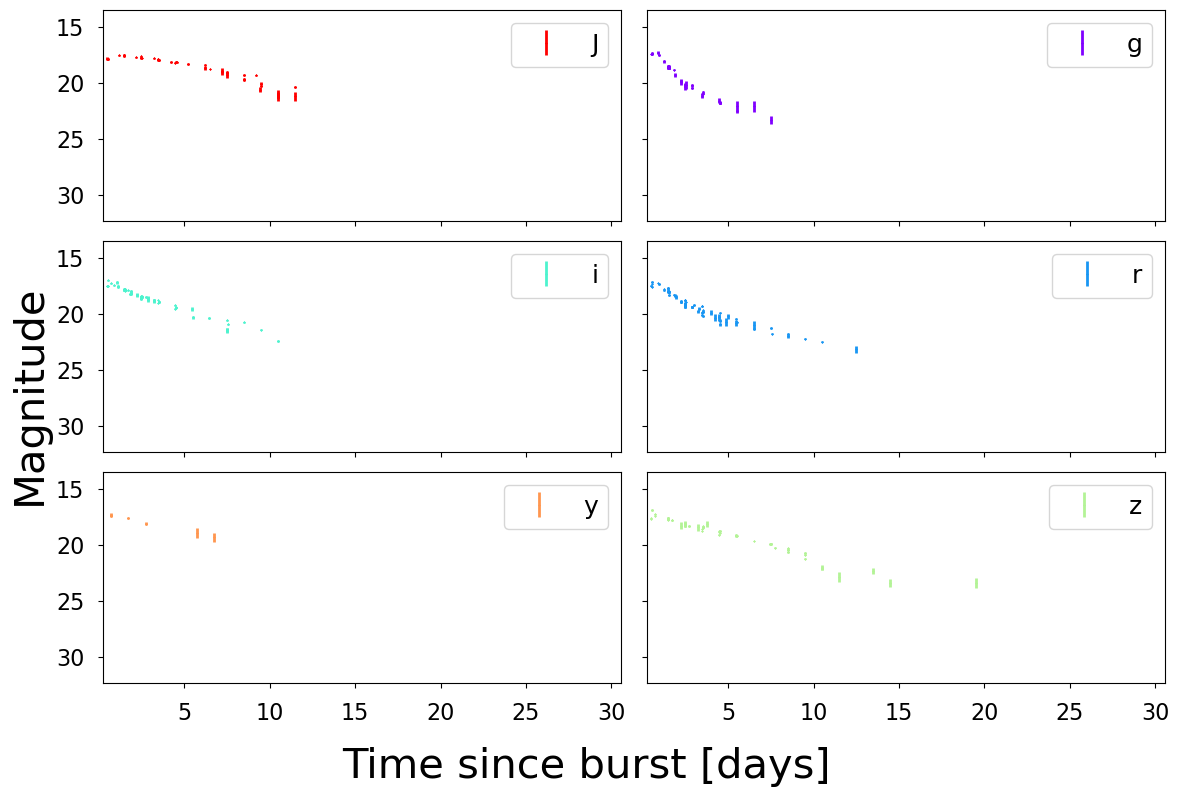

In [20]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 8))
ax = kilonova.plot_multiband(figure=fig, axes=axes,
                        filters=["g", "r", "i", "z", "y", "J"], save=False)

Here we also passed in our own constructred figure and axes to get the exact look. If you dont pass these in redback will figure it out on its own. Again, the axes are returned so users can also tinker with the plot further. Or pass things as keyword arguments in the function.

#### We can do the same thing with afterglows, supernovae, tde's etc etc

16:05 redback WARNING : This GRB has no measured redshift, using default z = 0.75


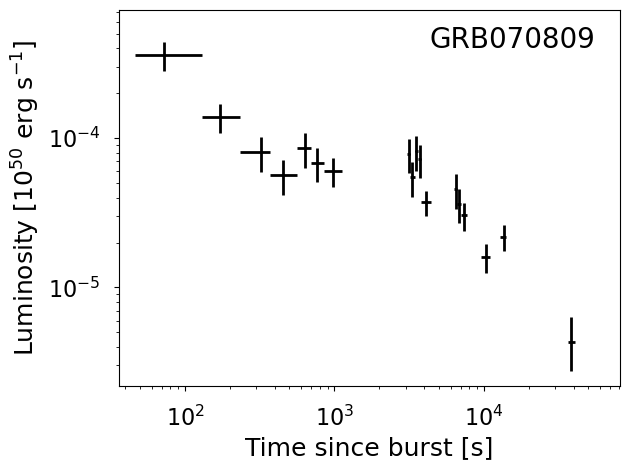

In [21]:
afterglow = redback.afterglow.SGRB.from_swift_grb(name=GRB, data_mode='flux',
                                                  truncate=True, truncate_method="prompt_time_error")
afterglow.analytical_flux_to_luminosity()
ax = afterglow.plot_data()

We can also plot/fit data in time in MJD, for scenario's when you don't know the true burst start time. This is done via using `use_phase_model=True`. When we get to fitting, this flag will ensure we use the right data and also infer the start time of the transient.

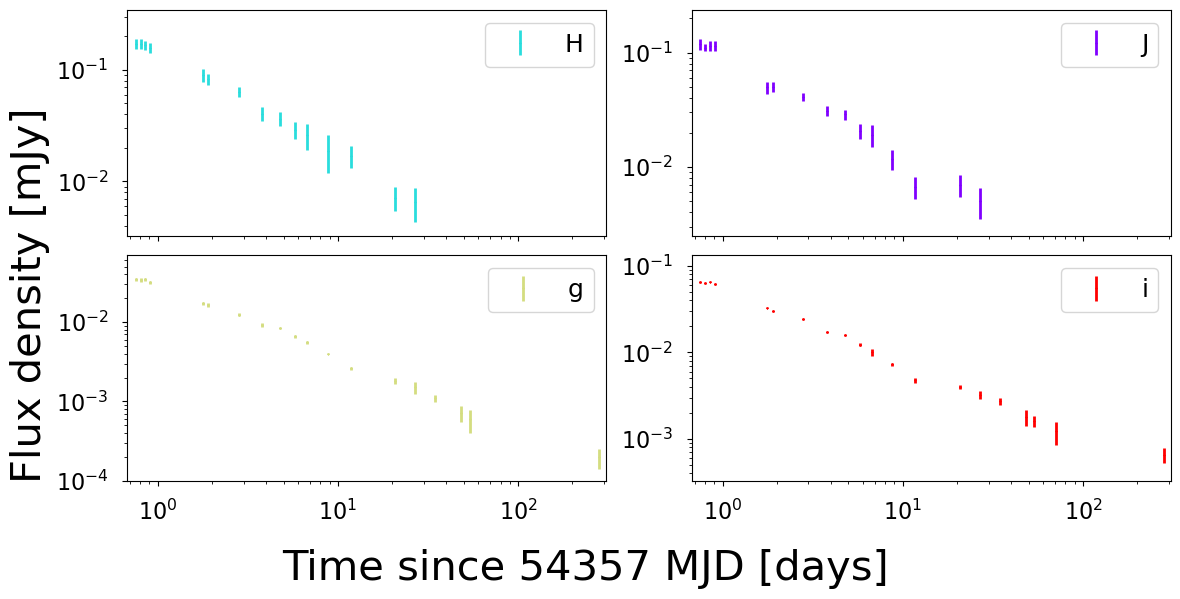

In [22]:
supernova = redback.supernova.Supernova.from_open_access_catalogue(name=sne, data_mode='flux_density', 
                                                                   use_phase_model=True)
ax = supernova.plot_multiband(filters=["J", "H", "g", "i"])

#### Sometimes the user may have their own data that they simulated or was their own private data. 

All redback transient objects can be constructed by just passing in the relevant properties. Enabling the same functionality as above (and to use in fitting..)

16:05 redback INFO    : Metadata does not exist for this event.
16:05 redback INFO    : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


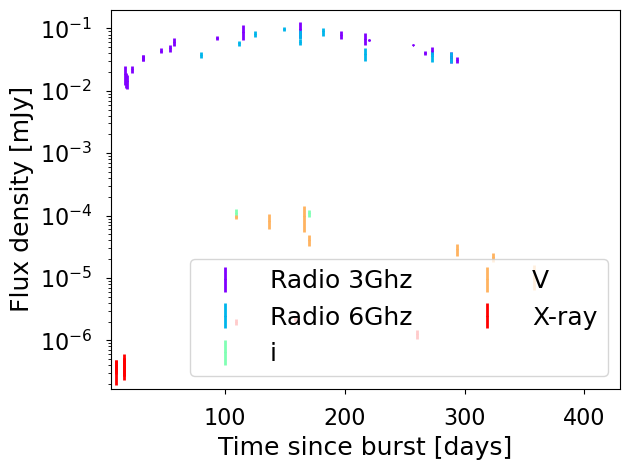

In [23]:
data = pd.read_csv('example_data/grb_afterglow.csv')
data['band'] = 'x'
data['band'].iloc[data['frequency'] == 2.418000e+17] = 'X-ray'
data['band'].iloc[data['frequency'] == 3.000000e+09] = 'Radio 3 GHz'
data['band'].iloc[data['frequency'] == 6.000000e+09] = 'Radio 6 GHz'
data['band'].iloc[data['frequency'] == 5.090000e+14] = 'V'
data['band'].iloc[data['frequency'] == 3.730000e+14] = 'i'
time_d = data['time'].values
flux_density = data['flux'].values
frequency = data['frequency'].values
flux_density_err = data['flux_err'].values
bands = data['band'].values
data_mode = 'flux_density'

name = '170817A'

afterglow = redback.transient.Afterglow(
    name=name, data_mode=data_mode, time=time_d,
    flux_density=flux_density, flux_density_err=flux_density_err, frequency=frequency)

ax = afterglow.plot_data(band_labels = ['Radio 3Ghz', 'Radio 6Ghz', 'i', 'V', 'X-ray'])

Like all other plots users can change things like plot labels, limits etc etc either by passing in a keyword argument or by modifying the axes of the plot.

16:05 redback INFO    : Metadata does not exist for this event.
16:05 redback INFO    : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


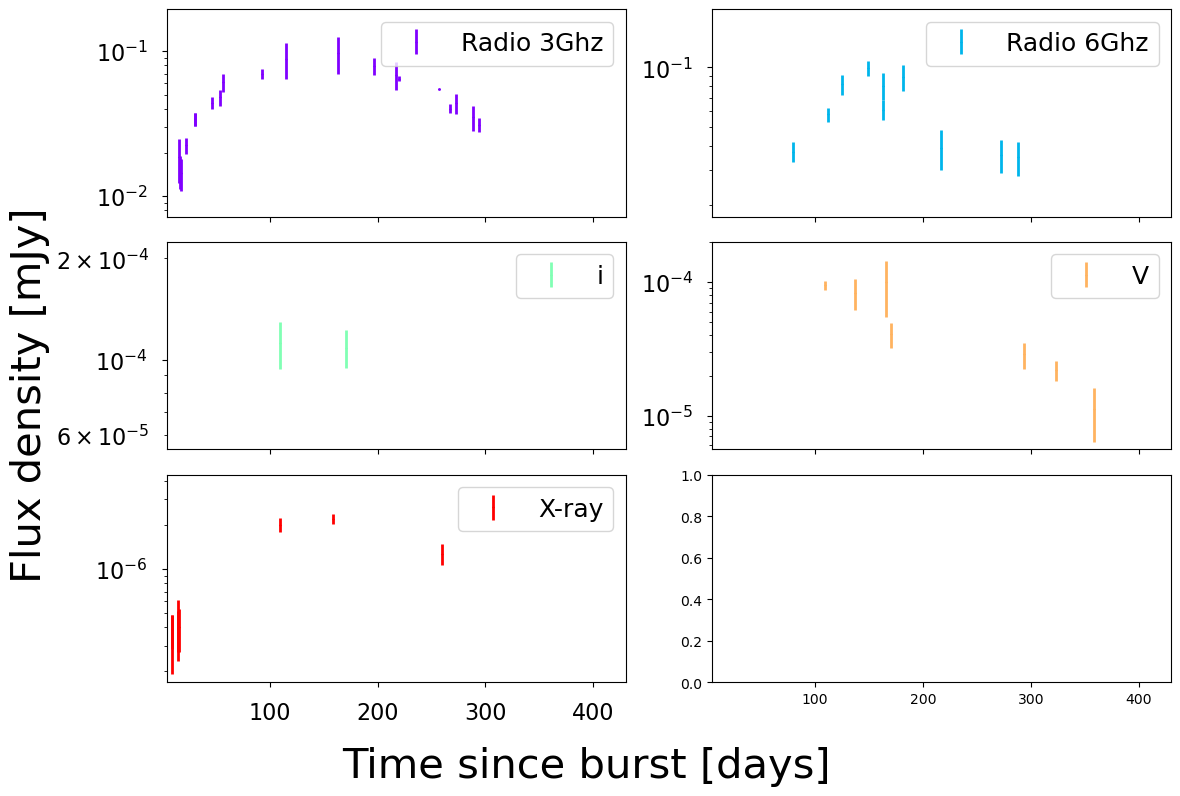

In [24]:
afterglow = redback.transient.Afterglow(
    name=name, data_mode=data_mode, time=time_d,
    flux_density=flux_density, flux_density_err=flux_density_err, frequency=frequency)

ax = afterglow.plot_multiband(band_labels = ['Radio 3Ghz', 'Radio 6Ghz', 'i', 'V', 'X-ray'])

## Models/Priors

We could also simulate the observations ourselves, then load each set of observations into a transient object and then do inference!!

To simulate observations, we need a model.

In redback we have already implemented a lot of different models, which can be combined or modified to create another model easily. These models range from phenomenological, to analytical, semi-analytical to numerical surrogates built with machine learning techniques. Implementing a new model is probably the easiest way to contribute to redback!

**Specifically, the models already included are**

**Afterglow models**:

- Several structured jet models implemented in afterglowpy.
- Tophat jet implemented in afterglowpy.
- Cocoon
- Kilonova afterglow
- Refreshed shocks
- Several more


**Kilonova models**

- One/two/three component kilonova models
- two_layer_stratified_kilonova
- power_law_stratified_kilonova
- kilonova heating rate
- One component BNS ejecta relation
- Two component BNS ejecta relation
- One component NSBH ejecta relation
- Two component NSBH ejecta relation
- Polytrope EOS ejecta relation
- Aspherical kilonova
- Three component model - ejecta relation
- Three component model - temperature floor
- Three component model - temperature floor and diffusion
- Metzger 2017
- Surrogates of several different numerical simulations e.g., Possis, Sedona
- Several more 

**Supernova models**

- Arnett
- CSM
- CSM + Ni
- Basic magnetar powered
- General magnetar powered
- Supernova 1A
- Supernova 1C
- SNcosmo
- magnetar + nickel
- SLSN
- exponential powerlaw
- Shock cooling + Arnett
- Several more

**Shock models**

- Shock cooling
- Thermal synchrotron
- Shocked cocoon

**Magnetar driven ejecta models**

- Metzger magnetar driven kilonova
- Mergernova
- Trapped magnetar
- General magnetar driven kilonova
- Evolving magnetar magnetar driven kilonova
- Evolving magnetar mergernova

**Millisecond magnetar models**

- vacuum dipole magnetar
- magnetar with variable braking index
- GW + EM magnetar
- evolving magnetar
- magnetar with radiative losses
- collapsing magnetar
- piecewise magnetar

**Tidal disruption models**

- Simple analytic fallback
- Surrogate from numerical simulation
- cooling envelope

**Phenomenological/fireball models/other exotica**

- Skew gaussian
- Skew exponential 
- fred
- fred_extended
- Gaussian
- 1-6 component piecewise power law
- exponential_powerlaw

We note that these models can output in flux_density or magnitude set by the keyword argument output_format or using the appropriate bolometric/flux function.

Alongside these models we also include some general models which can many of the above models as a base_model

- Homologous expansion
- Thin shell
- Extinction models
- Phase models
- Phase + extinction models
- Gaussian process base model: Will be soon implemented.

You can also make several modifications to all models using dependency injections or switches

#### For a full up to date list of models implemented in redback, look at the [API](https://redback.readthedocs.io/en/latest/index.html)

All models in redback are implemented as simple functions that do not require any other redback infrastructure. They can be used to simulate populations, get a sense of the impact of different parameters, or for debugging.

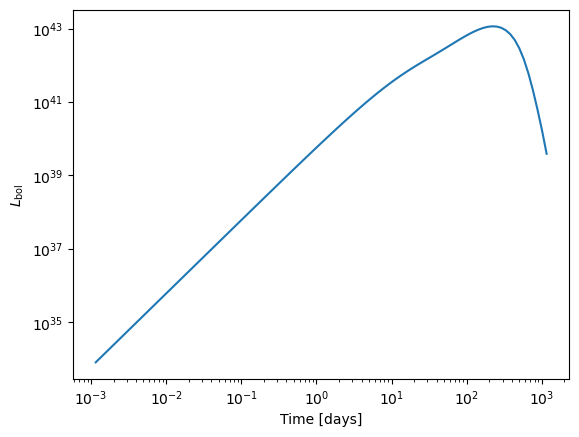

In [42]:
from redback.constants import day_to_s
from redback.model_library import all_models_dict

model = 'arnett_bolometric'
 
function = all_models_dict[model]

time = np.logspace(2, 8, 100)/day_to_s

bolometric_luminosity = function(time, f_nickel=0.2,
                    mej=30, vej=10000, kappa=2, kappa_gamma=1e2)
plt.loglog(time, bolometric_luminosity)
plt.xlabel('Time [days]')
plt.ylabel(r'$L_{\rm bol}$')
plt.show()

### Every function is documented, describing what the inputs are; their units etc etc. For some models we have also implemented a simple way to get a link to the paper describing it which provides further details. 

![](notebook_images/Docs.png)

In [26]:
print(function.citation)

https://ui.adsabs.harvard.edu/abs/1982ApJ...253..785A/abstract


We can also simulate an entire population by creating a population prior (what distribution each of the parameters for the entire population are drawn from) and simulate lightcurves for all of them. This does not capture realistic survey features e.g., cadence but that can be easily incorporated.

### Redback uses bilby for priors and there are plenty to choose from.

**Analytical priors**

- Beta
- Categorical
- Cauchy
- ChiSquared
- Cosine
- DeltaFunction
- Exponential
- FermiDirac
- Gamma
- Gaussian
- HalfGaussian
- LogGaussian
- LogUniform
- Logistic
- Lorentzian
- PowerLaw
- Sine
- StudentT
- SymmetricLogUniform
- TruncatedGaussian
- Uniform


**Interpolated or from file**

Users can also create a prior from a grid of values i.e., an interpolated_prior.
See documentation [here](https://lscsoft.docs.ligo.org/bilby/api/bilby.core.prior.interpolated.Interped.html#bilby.core.prior.interpolated.Interped).

Every function has a default prior which can be loaded via

In [27]:
priors = redback.priors.get_priors(model=model)
priors

{'f_nickel': LogUniform(minimum=0.001, maximum=1, name='f_nickel', latex_label='$f_{\\mathrm{Ni}}$', unit=None, boundary=None),
 'mej': LogUniform(minimum=0.0001, maximum=100, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_{\\odot})$', unit=None, boundary=None),
 'vej': LogUniform(minimum=1000.0, maximum=100000.0, name='vej', latex_label='$v_{\\mathrm{ej}}~(\\mathrm{km}/\\mathrm{s})$', unit=None, boundary=None),
 'kappa': Uniform(minimum=0.05, maximum=2, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None),
 'kappa_gamma': LogUniform(minimum=0.0001, maximum=10000.0, name='kappa_gamma', latex_label='$\\kappa_{\\gamma}~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None)}

This prior object is essentially a dictionary of the different priors describing the shape, range, latex labels and units of each of the parameters. You can overwrite any of the priors as you would a standard python dictionary

In [28]:
priors['f_nickel'] = 0.5

We can sample randomly from the prior to create fake lightcurves

In [29]:
samples = priors.sample(100)
samples = pd.DataFrame(samples)
samples

,f_nickel,mej,vej,kappa,kappa_gamma
0,0.5,39.744026,3595.347463,1.913852,7984.384422
1,0.5,0.087339,4521.884712,1.307121,0.090855
2,0.5,3.606952,5525.576592,0.819295,29.620209
3,0.5,0.737147,72004.655705,0.746997,0.643802
4,0.5,0.536487,19298.154834,1.708659,111.280689
...,...,...,...,...,...
95,0.5,31.079394,61035.657021,0.835370,14.018087
96,0.5,0.480260,1011.423016,1.067013,0.000332
97,0.5,16.722609,1446.431916,0.299949,0.629964
98,0.5,0.074849,51928.536873,0.993573,272.634342


We can place complex constraints on our prior to mimic a realistic survey. Say for example I wanted to create a population where none of the population was dimmer than 24th mag at peak in the r mag and that the peak was less than 50 days.

In [30]:
def brightness_constraint(parameters):
    """
    Ensure the Supernova is not dimmer than 24th Mag at peak and that the peak is at less than 150 days.
    """
    converted_parameters = parameters.copy()
    converted_parameters = pd.DataFrame(converted_parameters)
    kwargs = {}
    kwargs['frequency'] = redback.utils.bands_to_frequency('r')
    kwargs['bands'] = 'sdssr'
    kwargs['output_format'] = 'magnitude'
    tdays = np.linspace(1, 500, 50)
    mags = np.zeros(len(converted_parameters))
    peak_t = np.zeros(len(converted_parameters))
    for x in range(len(mags)):
        mag = function(tdays, **converted_parameters.iloc[x], **kwargs)
        mags[x] = np.min(mag)
        peak_t[x] = tdays[np.argmin(mag)]
    converted_parameters['peak_constraint'] = 24 - mags
    converted_parameters['peak_time'] = 150 - peak_t
    return converted_parameters

model = 'arnett'

function = all_models_dict[model]


priors = PriorDict(conversion_function=brightness_constraint)
priors['peak_constraint'] = bilby.core.prior.Constraint(0, 5)
priors['peak_time'] = bilby.core.prior.Constraint(0, 50)
priors.update(redback.priors.get_priors(model))
priors['redshift'] = 0.01
population_samples = pd.DataFrame(priors.sample(50))

## Simulation

#### We can now go through and create r band lightcurves for all of them. We can also similarly create light curves for any other filter. You can also use your own model as the 'engine'. 

The raw lightcurve can then be processed through redback.simulation to create realistic observations for real surveys/telescopes e.g., Rubin, Roman, ZTF or any other configuration built from user inputs.

In [31]:
for x in range(len(population_samples)):
    tdays = np.linspace(1, 500, 50)
    kwargs = {}
    kwargs['frequency'] = redback.utils.bands_to_frequency('r')
    kwargs['bands'] = 'sdssr'
    kwargs['output_format'] = 'magnitude'
    mags = function(tdays, **population_samples.iloc[x], **kwargs)
    plt.plot(tdays, mags, c='red', alpha=0.25)
plt.gca().invert_yaxis()
plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.xlim(1,500)
plt.ylim(35, 16)

(35.0, 16.0)

## Inference

With stuff about data/priors out of the way. Let's now turn to the primary purpose of redback: **inference**. 

#### Redback workflow for fitting
- Download the data from a public catalog, or provide your own data, or simulate it.

- Load the data into a homogenous transient object, which does the necessary processing and provides simple way to plot data. This also finds other metadata such as host galaxy/redshift/sky position if available on a public database

- Specify a model (either already implemented in redback or their own function).

- Write a prior or use the default priors.
    - Every model has default priors already implemented
    - Place constraints on the prior if necessary. These could be constraints related to the region the model is physical/something about the observation/non detections (this is one way but there are others), or where a numerical surrogate is trained on etc. 

- Specify a sampler and sampler settings as in bilby

- Fit model!

- The fit returns a homogenous result object, which can be used for further diagnostics, and provides a simple way to plot the fit.


#### The examples provide more detailed complicated examples of fitting different transients. Here in the interest of both time and to reduce complexity; I'll show a really simple/fast example.

In [32]:
# first specify some basic sampler settings, model name, transient name etc etc 

model = 'evolving_magnetar'
GRB = '070809'
# number of live points. Lower is faster but worse. Higher is slower but more reliable. 
nlive = 500
sampler = 'nestle'

#download the data 
data = redback.get_data.get_bat_xrt_afterglow_data_from_swift(grb=GRB, data_mode="flux")

# create the afterglow object; 
# truncate the data using the prompt_time_error method to get rid of 
# any erronous BAT data points not belonging to the transient.
afterglow = redback.afterglow.SGRB.from_swift_grb(name=GRB, data_mode='flux',
                                                  truncate=True, truncate_method="prompt_time_error")
# convert flux data to luminosity using an analytical approximation. 
# We could also use a numerical method utilising CIAO/Sherpa and the spectrum. 
afterglow.analytical_flux_to_luminosity()

# load the default priors for the model 
priors = redback.priors.get_priors(model=model)

result = redback.fit_model(model=model, sampler=sampler, nlive=nlive, transient=afterglow,
                           prior=priors, sample='rslice', resume=True)


16:05 redback WARNING : You are downloading BAT and XRT data, you will need to truncate the data for some models.
16:05 redback WARNING : The raw data file already exists. Returning.
16:05 redback WARNING : The processed data file already exists. Returning.
16:05 redback WARNING : This GRB has no measured redshift, using default z = 0.75
16:05 redback INFO    : No kwargs passed to function


#### The inference procedure will print out a bunch of things which are helpful diagnostics and indicate how things are processing, what settings are used and when things will finish. Most samplers have checkpointing so if for some reason your computer crashes/supercomputer goes down; progress is not lost.

The fitting returns a result object which has a lot of different attributes and methods allowing further diagnostics.

**A dataframe of the posterior values**

In [33]:
result.posterior

,a_1,alpha_1,p0,mu0,muinf,sinalpha0,tm,II,log_likelihood,log_prior
0,3.760059e-13,-0.718363,0.006263,1.413929,5.035914,0.022941,69.669317,1.744216e+45,339.641487,-92.370068
1,4.537227e+04,-4.530353,0.012708,4.445309,9.106673,0.689581,51.479754,4.354957e+45,346.019752,-132.616906
2,4.339091e+06,-5.611501,0.009510,3.244317,7.698891,0.146723,50.020120,3.467065e+45,346.472994,-136.949418
3,2.554564e+13,-9.083316,0.015383,7.431464,6.602458,0.476770,94.044547,7.865589e+45,346.898766,-153.356920
4,5.403712e+11,-8.248697,0.009354,3.674321,2.143325,0.095296,31.771432,4.231434e+45,347.300073,-148.880998
...,...,...,...,...,...,...,...,...,...,...
941,8.819455e+00,-2.408413,0.013062,6.268085,5.828468,0.065698,73.193456,8.073587e+45,355.898273,-124.688492
942,2.450190e+00,-2.111284,0.010939,4.329329,6.296687,0.122543,3.825196,5.582642e+45,355.901717,-123.038762
943,5.557523e+00,-2.298854,0.013567,6.735210,3.963450,0.117198,89.035103,8.701797e+45,355.918614,-124.301617
944,6.568485e+00,-2.327517,0.010044,3.616006,0.044978,0.229820,49.691527,4.643640e+45,355.924739,-123.840716


**Other metadata/methods**

In [34]:
print(result.log_evidence)
print(result.log_evidence_err)
print(result.bayesian_model_dimensionality)
print(result.covariance_matrix)
print(result.information_gain)
print(result.max_autocorrelation_time)
print(result.transient)
print(result.transient_type)
print(result.occam_factor(result.priors))

338.31005702324046
0.32564077909323447
5.900335147714941
[[ 5.19443282e+27 -6.00414855e+13  1.43293614e+10  1.30138309e+13
  -6.65806579e+12 -3.04576367e+11  7.48760896e+12  1.39499841e+58]
 [-6.00414855e+13  4.57413626e+00 -1.61158137e-04 -3.57792778e-01
   5.83232570e-01  6.15638173e-03 -2.93356946e+00 -3.65353547e+43]
 [ 1.43293614e+10 -1.61158137e-04  6.73866828e-06  5.14840701e-03
   3.48780878e-04  1.57029579e-04 -3.33827530e-04  5.17496128e+42]
 [ 1.30138309e+13 -3.57792778e-01  5.14840701e-03  4.27884501e+00
   3.93290406e-01  5.59028587e-03 -4.25558670e-01  4.67591738e+45]
 [-6.65806579e+12  5.83232570e-01  3.48780878e-04  3.93290406e-01
   8.28938233e+00 -1.30939914e-01 -1.52082878e+00  9.01218589e+44]
 [-3.04576367e+11  6.15638173e-03  1.57029579e-04  5.59028587e-03
  -1.30939914e-01  6.19256378e-02  7.15322398e-01 -2.05306370e+44]
 [ 7.48760896e+12 -2.93356946e+00 -3.33827530e-04 -4.25558670e-01
  -1.52082878e+00  7.15322398e-01  7.61157781e+02 -4.56391336e+45]
 [ 1.3949984

## Plotting

**Plotting methods**

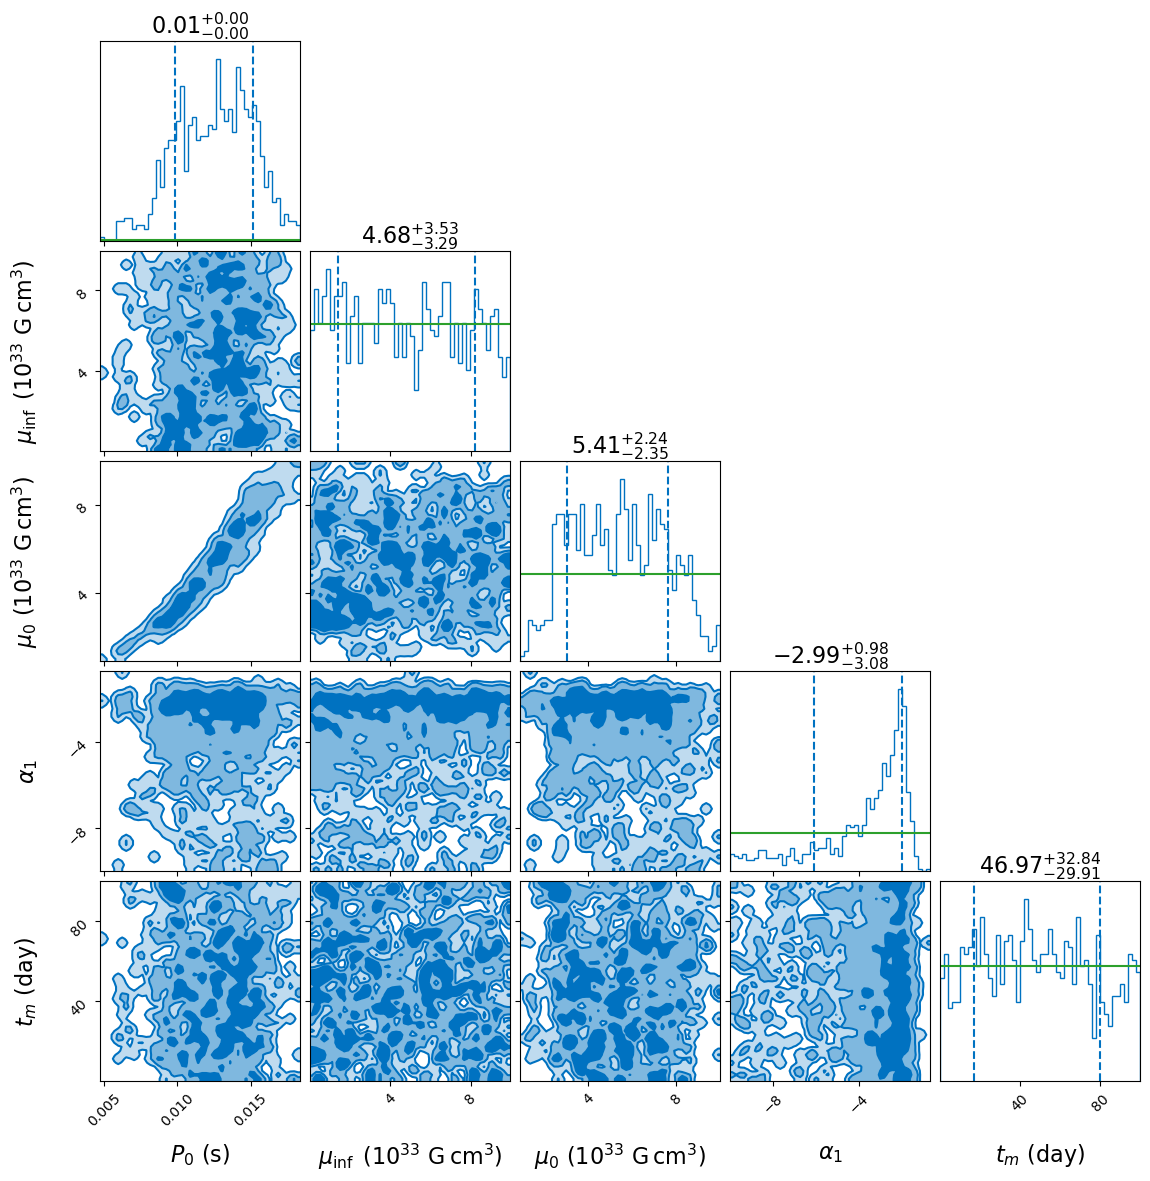

In [35]:
result.plot_corner(parameters=['p0', 'muinf', 'mu0', 'alpha_1', 'tm'], save=False, priors=True)
plt.show()

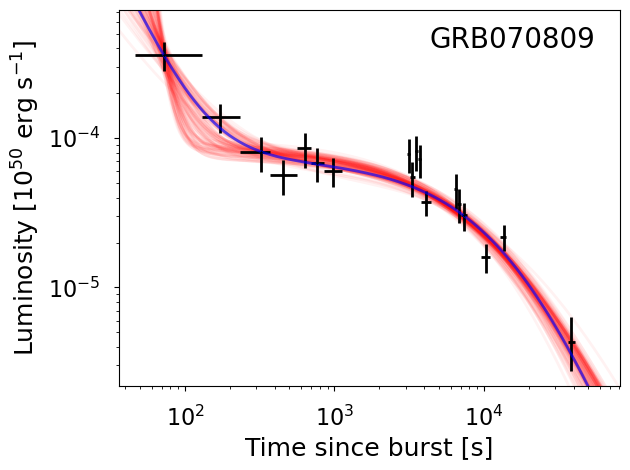

<Axes: xlabel='Time since burst [s]', ylabel='Luminosity [$10^{50}$ erg s$^{-1}$]'>

In [36]:
result.plot_lightcurve(random_models=100)

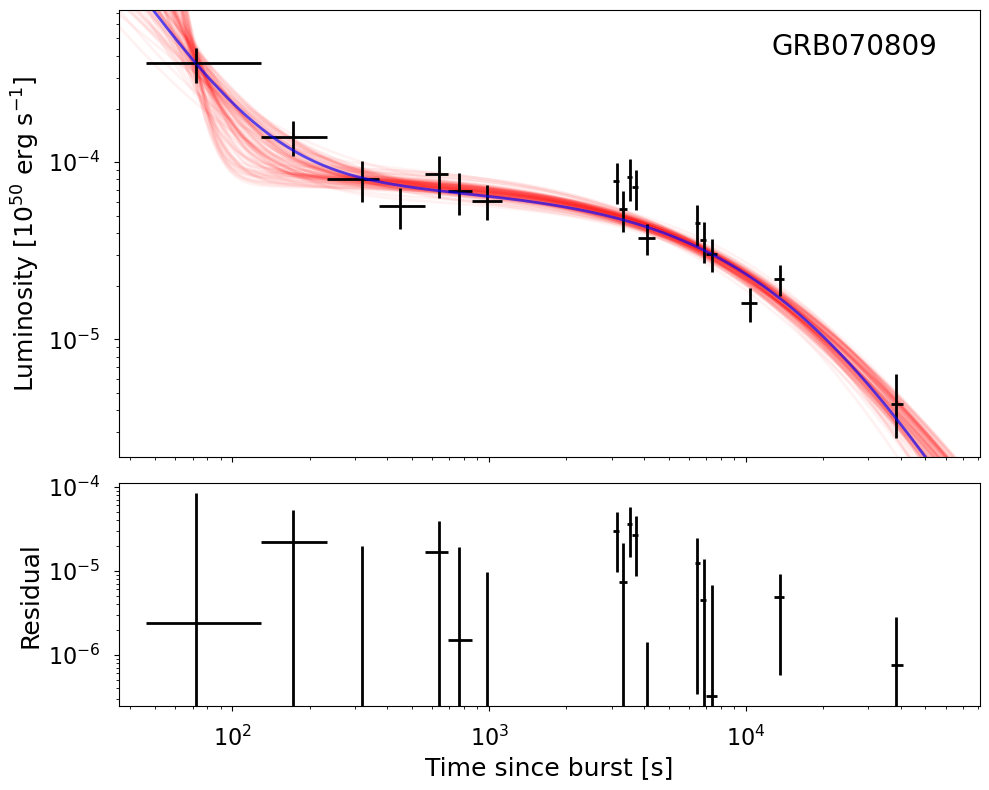

array([<Axes: ylabel='Luminosity [$10^{50}$ erg s$^{-1}$]'>,
       <Axes: xlabel='Time since burst [s]', ylabel='Residual'>],
      dtype=object)

In [37]:
result.plot_residual(random_models=100)

#### Method to plot multiband lightcurve; 1 band/frequency on each panel with fit going through them.

`result.plot_multiband_lightcurve`

#### Method to plot the transient data; i.e., same thing as the transient object plot_data and plot_multiband.

`result.plot_data`

`result.plot_multiband`

#### Method to plot the CDF and PDF of all parameters/log_likelihood and log_prior

`result.plot_marginals`

#### Method to plot the walkers if using an MCMC sampler 

`result.plot_walkers`


#### Other result features

- Reweighting to a different prior/model.

- Changing formats; creating an arviz result object.

- Making pp plots for a population

- Hierarchical inference/recycling functionality.


In [38]:
redback.utils.calc_one_dimensional_median_and_error_bar(result.posterior['alpha_1'], 
                                                        quantiles=(0.16,0.84), fmt='.2f').string

'${-2.99}_{-3.08}^{+0.98}$'

#### You can also load a result file from different analyses enabling the same functionality as above.

In [39]:
path = 'GRBData/afterglow/luminosity/evolving_magnetar/GRB070809_result.json'
my_result = redback.result.read_in_result(path)

## Contributing/Plans

**Redback is open source**. Anybody wishing to contribute should reach out to [Nikhil Sarin](mailto:nikhil.sarin@su.se?subject=Contributing%20to%20redback). The contributions can range from simply testing/bug fixing the package to implementing new features/models etc. 


## Learning more


There are several examples showing the different abilities of redback in more detail. 

- broadband_afterglow_private_data_example
- fit_your_own_model_example
- kilonova_example
- magnetar_boosted_example
- magnetar_example
- prompt_example
- supernova_example
- tde_example
- SN2011kl_sample_in_t0_example
- Sampling with constraint priors
- homologous expansion
- Simulating a population with redback
- Simulating a kilonova in Rubin
- Creating and sampling with new ejecta relations
- Joint likelihood analysis
- Gaussian process with a redback base model using george/celerite
- Several more 

**Check out all the examples [here](https://github.com/nikhil-sarin/redback/tree/master/examples). There is also extensive [documentation](https://redback.readthedocs.io/en/latest/).**

<img src="notebook_images/RedbackLogo.png" alt="drawing" width="500"/>